In [1]:
# Tools
#loading Arxiv
from langchain_community.tools import ArxivQueryRun,WikipediaQueryRun
from langchain_community.utilities import ArxivAPIWrapper,WikipediaAPIWrapper

In [2]:
api_wrapper_arxiv=ArxivAPIWrapper(top_k_results=2,doc_content_chars_max=500)
arxiv=ArxivQueryRun(api_wrapper=api_wrapper_arxiv,description="query arxiv papers")
print(arxiv.name)

arxiv


In [3]:
arxiv.invoke("attention all you need")

'Published: 2021-05-06\nTitle: Do You Even Need Attention? A Stack of Feed-Forward Layers Does Surprisingly Well on ImageNet\nAuthors: Luke Melas-Kyriazi\nSummary: The strong performance of vision transformers on image classification and other vision tasks is often attributed to the design of their multi-head attention layers. However, the extent to which attention is responsible for this strong performance remains unclear. In this short report, we ask: is the attention layer even necessary? Specifi'

In [4]:
api_wraper_wikipedia=WikipediaAPIWrapper(top_k_results=2,doc_content_chars_max=500)
wiki=WikipediaQueryRun(api_wrapper=api_wraper_wikipedia, description="wikipedia search")
wiki.name

'wikipedia'

In [5]:
wiki.invoke("Sachin Tendulkar")

'Page: Sachin Tendulkar\nSummary: Sachin Ramesh Tendulkar ( ; Marathi: [sətɕin t̪eɳɖulkəɾ]; born 24 April 1973) is an Indian former international cricketer who captained the Indian national team. Often dubbed the "God of Cricket" in India, he is widely regarded as one of the greatest cricketers of all time. He holds several world records, including being the all-time highest run-scorer in international cricket, receiving the most player of the match awards in international cricket, and being the o'

In [6]:
from dotenv import load_dotenv
load_dotenv()

import os
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")
os.environ["TAVILY_API_KEY"]=os.getenv("TAVILY_API_KEY")


In [7]:
from langchain_community.tools.tavily_search import TavilySearchResults


In [8]:
tavily=TavilySearchResults()

C:\Users\parth\AppData\Local\Temp\ipykernel_2672\1844490623.py:1: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the `langchain-tavily package and should be used instead. To use it run `pip install -U `langchain-tavily` and import as `from `langchain_tavily import TavilySearch``.
  tavily=TavilySearchResults()


In [9]:
tavily.invoke("Provide me recent AI news")

[{'title': 'AI News | Latest News | Insights Powering AI-Driven Business Growth',
  'url': 'https://www.artificialintelligence-news.com/',
  'content': 'AI News is part of the TechForge Publications series\n\nTechForge\n\n## Featured\n\nGovernment & Public Sector AI\n\n# The future of rail: Watching, predicting, and learning\n\nDecember 24, 2025\n\nWhy Disney is embedding generative AI into its operating model\n\nEntertainment & Media\n\nDecember 24, 2025\n\n# Disney is embedding generative AI into its operating model\n\nAI Hardware & Chips\n\nDecember 23, 2025\n\n# Arm and the future of AI at the edge\n\n## Popular [...] # On-Demand Webinar: How Polymorphic Malware is Outsmarting Your Email Security\n\nResource\n\nNovember 25, 2025\n\n# How to Calculate Business Value and Cost for Generative AI Use Cases\n\n## Events\n\n## Event\n\n### Data Centers Expo North America 2026\n\n18 May 2026 9:00 am\n\nto\n\n19 May 2026 5:00 pm\n\nSan Jose McEnery Convention Center\n\n|\n\nCalifornia\n\n##

In [10]:
tools=[arxiv,wiki,tavily]

In [11]:
from langchain_groq import ChatGroq

In [12]:
llm=ChatGroq(model="qwen/qwen3-32b")

In [13]:
llm.invoke("what is AI")

AIMessage(content="<think>\nOkay, the user is asking, 'What is AI?' I need to explain AI in a clear and comprehensive way. Let me start by defining AI. Artificial Intelligence, or AI, refers to machines or systems that perform tasks typically requiring human intelligence. But I should go beyond the basic definition.\n\nFirst, I should mention the main categories of AI. There's narrow AI and general AI. Narrow AI is what's commonly used today, like virtual assistants or recommendation systems. General AI is more advanced and doesn't exist yet, so that's a good point to highlight the current state versus future possibilities.\n\nNext, the key components of AI. Machine learning is a big part, where systems learn from data. Maybe I should explain supervised learning, unsupervised learning, and reinforcement learning. Then there's deep learning, which uses neural networks. Mentioning neural networks and how they're inspired by the human brain would be helpful.\n\nApplications are important 

In [14]:
llm_with_tools=llm.bind_tools(tools=tools)


In [15]:
llm_with_tools.invoke("What is recent news on AI")

AIMessage(content='', additional_kwargs={'reasoning_content': 'Okay, the user is asking for recent news on AI. Let me see which tool I should use here. The available tools are arxiv, wikipedia, and tavily_search_results_json. \n\nArxiv is for academic papers, so maybe not the best choice for news. Wikipedia might have some information, but it\'s more of an encyclopedia and might not have the latest news. The third option is tavily_search_results_json, which is described as a search engine optimized for current events. That sounds perfect for recent news.\n\nSo I should use tavily_search_results_json. The parameter needed is a query. The user\'s query is "recent news on AI". I need to make sure the arguments are correctly formatted as a JSON object with the query parameter. Let me structure the tool call accordingly.\n', 'tool_calls': [{'id': '8typ3b5rp', 'function': {'arguments': '{"query":"recent news on AI"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}]}, response_met

In [16]:
llm_with_tools.invoke("What is latest research paper quantum computing")

AIMessage(content='', additional_kwargs={'reasoning_content': 'Okay, the user is asking for the latest research paper on quantum computing. I need to figure out which tool to use here. The available tools are arxiv, wikipedia, and tavily_search. \n\nArxiv is a repository for preprints in physics, math, and computer science, so that\'s probably the best place to look for recent research papers. Wikipedia might have general information but not the latest papers. Tavily search is for current events, but research papers might be better found on arxiv.\n\nSo I should use the arxiv function. The parameter needed is a query. The user\'s query is "latest research paper quantum computing". I should make sure the query is specific enough. Maybe just "quantum computing" as the search term. But since they want the latest, arxiv\'s default sorting is by date, so the first result should be the most recent. \n\nI need to structure the tool call correctly. The function name is arxiv, and the arguments

In [17]:
#building workflow in LangGraph
from typing_extensions import TypedDict #for entire State
from langchain_core.messages import AnyMessage #human or AI message
from typing import Annotated  #labeling
from langgraph.graph.message import add_messages #add messages is reducer in langgraph

In [18]:
class State(TypedDict):
    messages:Annotated[list[AnyMessage], add_messages]

In [19]:
from IPython.display import display,Image
from langgraph.graph import StateGraph,START, END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

In [20]:
def tool_calling_llm(state:State):
    return {"messages":[llm_with_tools.invoke(state["messages"])]}

#graph building
builder=StateGraph(State)
builder.add_node("tool_calling_llm",tool_calling_llm)
builder.add_node("tools",ToolNode(tools))


In [21]:
builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    tools_condition
)
builder.add_edge("tools", END)

In [22]:
#compile graph
graph_builder = builder.compile()

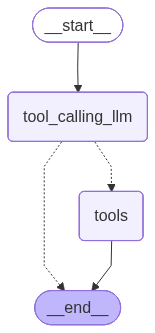

In [23]:
#view graph
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [24]:
from langchain_core.messages import HumanMessage
temp_message = graph_builder.invoke(
    {"messages": [HumanMessage(content="What is pydantic library?")]}
)

In [25]:
for m in temp_message["messages"]:
    print(m.pretty_print())

================================ Human Message =================================

What is pydantic library?
None
================================== Ai Message ==================================
Tool Calls:
  wikipedia (6hqje9mw7)
 Call ID: 6hqje9mw7
  Args:
    query: Pydantic library
None
================================= Tool Message =================================
Name: wikipedia

Page: FastAPI
Summary: FastAPI is a high-performance web framework for building HTTP-based service APIs in Python 3.8+.  It uses Pydantic and type hints to validate, serialize and deserialize data. FastAPI also automatically generates OpenAPI documentation for APIs built with it. It was first released in 2018.


None


In [ ]:
from langchain_core.messages import HumanMessage
temp_message = graph_builder.invoke(
    {"messages": [HumanMessage(content="What is recent AI news and tell me recent research paper on Quantum computing?")]}
)

for m in temp_message["messages"]:
    print(m.pretty_print())

================================ Human Message =================================

How are you? and tell me recent research paper on Quantum computing?
None
================================== Ai Message ==================================

I'm doing well, thank you! To find recent research papers on quantum computing, I'll query the arxiv database for the latest publications in that field. Let me look that up for you.
Tool Calls:
  arxiv (9cy7pzz80)
 Call ID: 9cy7pzz80
  Args:
    query: quantum computing
None
================================= Tool Message =================================
Name: arxiv

Published: 2022-11-04
Title: Tierkreis: A Dataflow Framework for Hybrid Quantum-Classical Computing
Authors: Seyon Sivarajah, Lukas Heidemann, Alan Lawrence, Ross Duncan
Summary: We present Tierkreis, a higher-order dataflow graph program representation and runtime designed for compositional, quantum-classical hybrid algorithms. The design of the system is motivated by the remote nature of